# Plot station connections

In [1]:
%matplotlib inline
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
import fiona
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

In [27]:
# Read station data
stations = pd.read_csv('stations.csv')
stations.set_index('id', inplace=True)

sid = 2  # Michigan Ave & Balbo

# Create a map centered on station
s_lat = stations.loc[sid].latitude
s_lon = stations.loc[sid].longitude

delta_lon = 0.075
delta_lat = 0.05

map = Basemap(projection='tmerc', ellps='WGS84',
              lon_0=s_lon,
              lat_0=s_lat,
              llcrnrlon=s_lon - delta_lon, llcrnrlat=s_lat - delta_lat,
              urcrnrlon=s_lon + delta_lon, urcrnrlat=s_lat + delta_lat,
              resolution='i', suppress_ticks=True)


In [28]:
# Read neighborhoods shapefile
sfname = 'chi_ca/chi_ca'
map.readshapefile(sfname, name='chicago',
                  drawbounds=False, color='none', zorder=2)

hoods = pd.DataFrame({'poly': [Polygon(xy) for xy in map.chicago],
                      'name': [n['community'] for n in map.chicago_info]})

# Create a patch for each neighborhood
hoods['patch'] = hoods['poly']\
    .map(lambda x: PolygonPatch(x, fc='#AAAAAA',
                                ec='#000000', lw=.25, alpha=.9,
                                zorder=1))
    
# Convert station lon,lat to mapped x,y
stations['map_point'] = [Point(map(x, y)) for x, y in zip(stations['longitude'], stations['latitude'])]

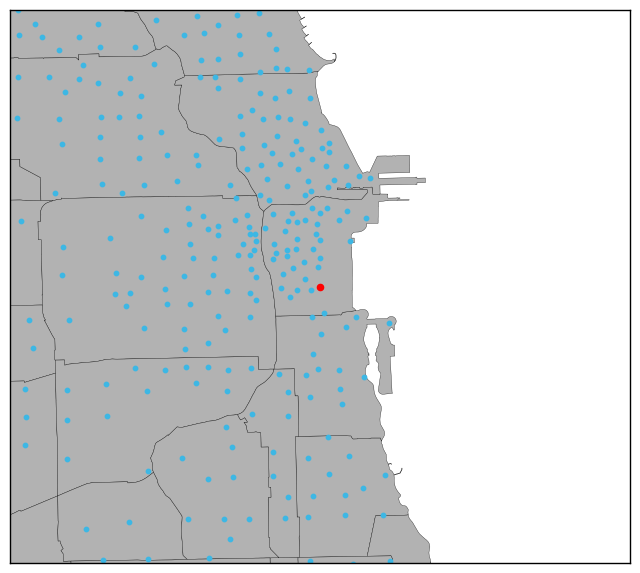

In [29]:
fig = pp.figure(figsize=(8, 8))
ax = pp.axes()

# Plot center station
map.scatter(stations.loc[sid].map_point.x, stations.loc[sid].map_point.y,
            s=20, facecolor='#FF0000', edgecolor='#FF0000', zorder=3)

map.scatter([pt.x for pt in stations['map_point']],
            [pt.y for pt in stations['map_point']],
            s=10, facecolor='#3db7e4', edgecolor='#3db7e4', zorder=2)

ax.add_collection(PatchCollection(hoods['patch'].values, match_original=True))

pp.show()